In [31]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [32]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv
data = pd.read_csv("./data/irises.csv",delimiter='|', header='infer', encoding='utf-8') 
# Preview the first 5 lines of the loaded data 
data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [33]:
# Check data types
data.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width      object
Species          object
dtype: object

In [34]:
# Replace , to . in Petal.Width and change object to float64
data['Petal.Width'] = data['Petal.Width'].str.replace(',','.').astype(np.float64)

In [36]:
# Check summary: 
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,150.000000,150.000000
mean,5.779333,3.061745,3.758000,1.199333
std,1.197721,0.433963,1.765298,0.762238
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# There is a data where length is < 0 - remove or reaplace 
# Convert to absolute value
data['Sepal.Length'] = data['Sepal.Length'].abs()

In [39]:
# Check results
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,150.000000,150.000000
mean,5.843333,3.061745,3.758000,1.199333
std,0.828066,0.433963,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
# Drop nan records if exists
data = data.dropna()

In [55]:
data.groupby('Species').size()

Species
setosa        50
versicolor    49
virginica     50
dtype: int64

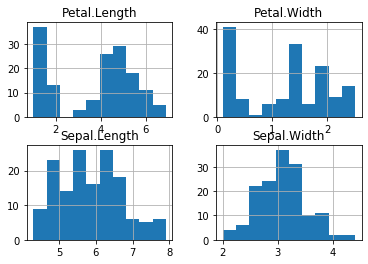

In [56]:
data.hist()
pyplot.show()

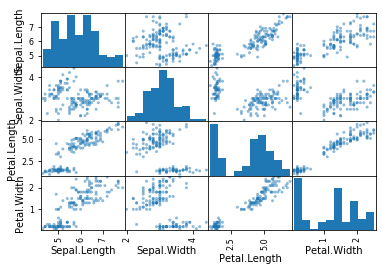

In [57]:
scatter_matrix(data)
pyplot.show()

In [58]:
# Create a Validation Dataset
# Split-out validation dataset
array = data.values
# Take columns from 0:4 (all rows)
X = array[:,0:4]
# Take columns 4 all (all rows)
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [65]:
# Check if col splitted correctly
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [72]:
# Algorithms Regarding to scikit-learn documentation
# My purpose was to take 5 - 6 Algorithms and compere them
models = []
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ 
# option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.
# (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

# Model Nr 1
# LIBLINEAR is the winner of ICML 2008 large-scale learning challenge. 
# It applies Automatic parameter selection (a.k.a L1 Regularization) and it’s recommended
# when you have high dimension dataset (recommended for solving large-scale classification problems)
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

# Model Nr 2
# Linear Discriminant Analysis
# A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
#The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
#The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.
models.append(('LDA', LinearDiscriminantAnalysis()))

# Model Nr 3
# Classifier implementing the k-nearest neighbors vote.
models.append(('KNN', KNeighborsClassifier()))

# Model Nr 4
# Classifier implementing the k-nearest neighbors vote.
models.append(('CART', DecisionTreeClassifier()))

# Model Nr 5
# Gaussian Naive Bayes (GaussianNB)
models.append(('NB', GaussianNB()))

# Model Nr 6
# C-Support Vector Classification.
# gamma{‘scale’, ‘auto’} or float, optional (default=’scale’)
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features.
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Stratified K-Folds cross-validator
    # Provides train/test indices to split data in train/test sets.
    # This cross-validation object is a variation of KFold that returns stratified folds. 
    # The folds are made by preserving the percentage of samples for each class.
    # Whether to shuffle each class’s samples before splitting into batches.
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Evaluate a score by cross-validation
    # Model selection and evaluation using tools, such as model_selection.GridSearchCV and model_selection.cross_val_score, 
    # take a scoring parameter that controls what metric they apply to the estimators evaluated.
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # Mean is a simple mathematical average of the set of two or more number. 
    # Standard deviation is statistics that basically measure the distance from the mean
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.934382 (0.047816)
LDA: 0.975641 (0.037246)
KNN: 0.965793 (0.042058)
CART: 0.958100 (0.058550)
NB: 0.942075 (0.038231)
SVM: 0.983974 (0.032083)


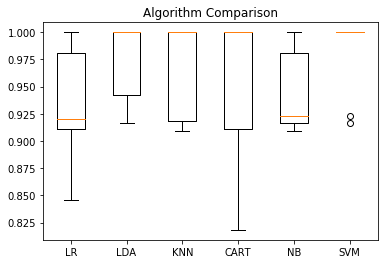

In [61]:
# Algorithms results
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [76]:
# Make predictions on validation dataset all Algorithms
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    # Evaluate predictions
    print(confusion_matrix(Y_validation, predictions))
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

[[10  0  0]
 [ 0  9  4]
 [ 0  0  7]]
0.8666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.69      0.82        13
   virginica       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.90      0.87        30
weighted avg       0.92      0.87      0.87        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]
0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1